<a href="https://colab.research.google.com/github/sashasgithome/iris-dataset-stuff/blob/main/GaussianNaiveBayes_MainNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Assignment : Naive Bayes Application

> by Sasha A.



###Part 1 : Data Acquisition

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species'] = data.target

> Please note that the SKLEARN library is **ONLY USED FOR OBTAINING DATASET**. This is because some external sources have null values/incorrect data formatting that hinders the pre-processing.





> All Exploratory Data Analaysis, Naive Bayes functions & calculations, including Evaluation methods (calculations) will be done by **manual code**, without any machine learning library.



###Part 2 : Exploratory Data Analysis



> First, get a gist of the structure of the dataframe.



In [ ]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     Species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  




> To further see the range of values (including relationships between features, if necessary), let's do a pairplot.



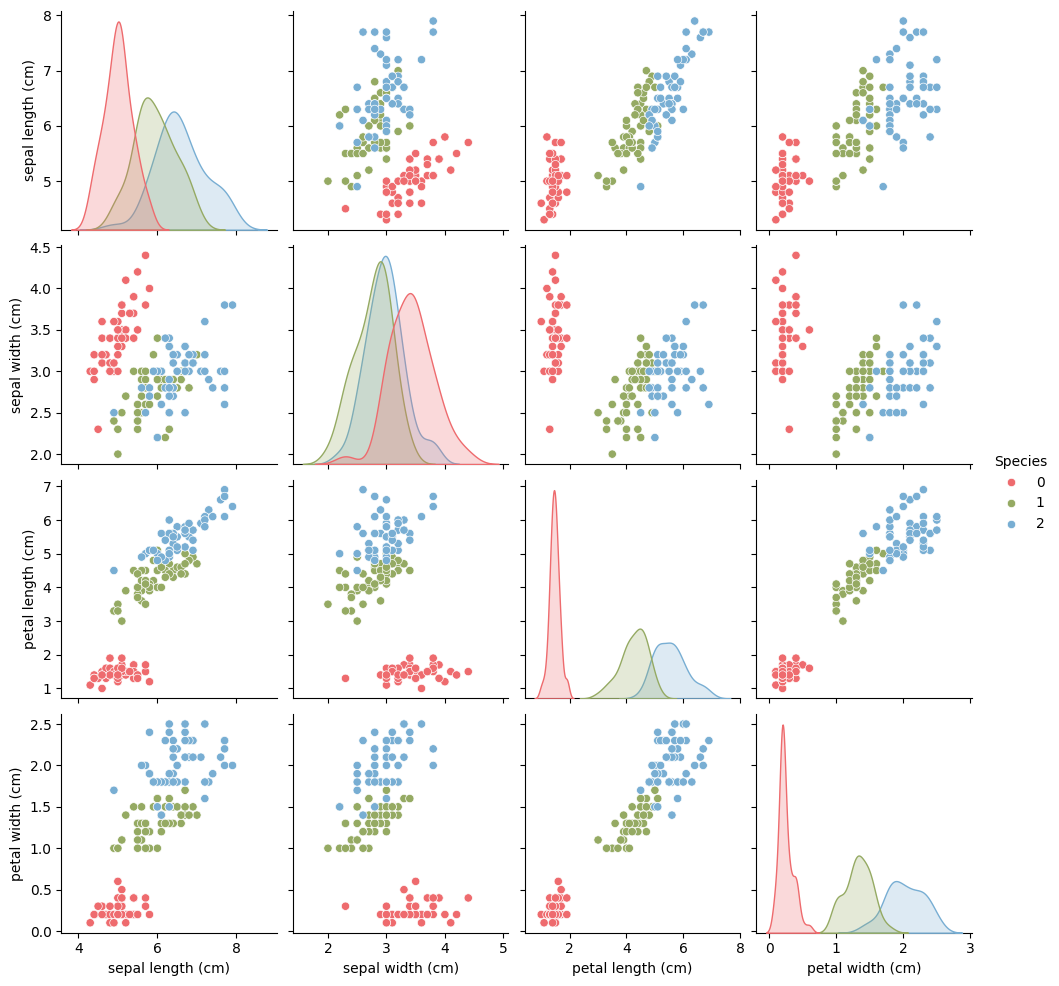

In [ ]:
custom = ['#EE6B6E', '#95AA63', '#78AED3']
sns.pairplot(df, hue='Species',palette=custom)
plt.show()

> As seen above, the Iris Dataset consists of **continuous** **measurements**. The sepal length, sepal width, petal length, petal width have continuous values (the values of data can take any value within a range, including fractions and decimals).



> Looking at this, the **Gaussian Naive Bayes** would be suitable for continuous data, especially if it is assumed the features follow a normal (Gaussian) distribution.

###Part 3 : Test/Training Data Splitting



> The *splitting_data* function will split the data values into 'test' and 'training' samples. In this particular case, we are asked to split training:test data by 80:20. As such, the test size is 0.2 (20%)




In [ ]:
types_of_species = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df['Species'] = df['Species'].map(types_of_species)

In [ ]:
def splitting_data(X, y, test_size=0.2):

    #permutates the order of data in the dataset
    indices = np.random.permutation(len(X))
    #gets the number of test data needed
    test_size = int(len(X) * test_size)

    #gets the first number of data for test, and the remaining for training
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices], train_indices, test_indices





> After defining the *splitting_data* function, next is to execute it. The output indices for both 'test' and 'training' can be seen as well.



In [ ]:
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test, train_indices, test_indices = splitting_data(X, y, test_size=0.2)

print("Training indices:", train_indices)
print("Testing indices:", test_indices)

Training indices: [ 73 113 143  47  93  14  55  19  92 126  82 128  11 131  27 122 106 132
 138  60  10  96 149 144   9  44 119  49  50 146 120  91  33 123  41  67
  90  65  71  89  48  61   6  80 148  94  38  83 112 145  68  87  13 111
  46 103 100   3  32 115   7  15  20  59  26  56   2  81 137  51  24 135
  79 139  34 125  76  86  64 136 114  17  74  28  58  85  66 116   1 105
  70  30  12  23  36 142 101 121  18  57  53 102 124  69 140  95 118 110
 129  54   4  16  43  25   0  39  88  97 147 141]
Testing indices: [130  62  84 104  35  21  45  22   5  31  29  99  63  75 134 108 117  78
  52   8  98 109  42  40  72  37 127 107  77 133]


###Part 4 : Gaussian Naive Bayes

> The formula for Naive Bayes is as seen below.




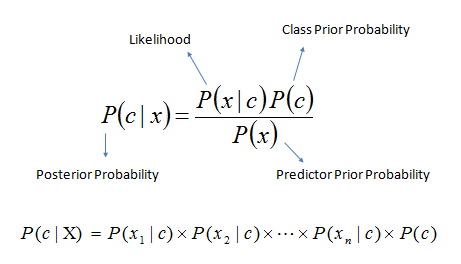

> Here, the "posterior probability" will show the probability that a data point (or instance) belongs to a particular class given its features. In the context of Gaussian Naive Bayes (GNB), to obtain the posterior probabilities for each class, we :
1. Compute the likelihood of a data point's features under each class
2. Multiply it by the prior probability of the class

> For simplicity, all functions for Naive Bayes model will be under the GaussianNaiveBayes Class.

In [ ]:
class GaussianNaiveBayes:

    #getting P(c)
    def fit(self, x, y):
        #store the class probabilities, mean of each feature per class, and variance of each feature per class
        self.classes = np.unique(y)
        self.class_probs = {}
        self.mean = {}
        self.variance = {}

        #calculate the class probabilities -- P(c)
        for c in self.classes:
            x_c = x[y == c]
            self.class_probs[c] = len(x_c) / len(x)
            self.mean[c] = np.mean(x_c, axis=0)
            self.variance[c] = np.var(x_c, axis=0)

            #handles zero variance by adding a small value (Laplace Smoothing) -- may not be necessary
            self.variance[c][self.variance[c] == 0] = 1e-9

            #display
            print(f"Class {c}:")
            print(f"Mean: {self.mean[c]}")
            print(f"Variance: {self.variance[c]}")
            print(f"Class Probability: {self.class_probs[c]}")
            print("="*50)

    #getting P(x | c)
    def get_likelihood(self, x, mean, var):
        print(f"x: {x}")
        print(f"mean: {mean}")
        print(f"var: {var}")

        #avoids divide by zero and negative variance issues -- may not be necessary!
        var[var == 0] = 1e-9

        #calculates Gaussian probability density function (PDF) for x, given mean and variance of the feature in class
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        likelihood = (1 / np.sqrt(2 * np.pi * var)) * exponent
        print(f"exponent: {exponent}")
        print(f"likelihood: {likelihood}")
        return likelihood

    #getting P(c ∣ x)
    def predict_data(self, X):
        preds = []

        #iterating for each feature
        for x in X:
            posteriors = []
            #going through all classes for each feature
            for c in self.classes:

                #for each class c, calculate the probability of observing the features x given the class c -- P(x∣c)
                likelihood = self.get_likelihood(x, self.mean[c], self.variance[c])
                print(f"Data Point: {x}")
                print(f"Class: {c}")
                print(f"Likelihood: {likelihood}")

                #using Bayes' theorem, calculate the posterior probability P(c∣x) for each class c given the data point x
                posterior = np.prod(likelihood) * self.class_probs[c]  # P(x|c) * P(c)
                print(f"Posterior: {posterior}")
                posteriors.append(posterior)

            #select the class with the highest posterior probability as the predicted class for the data point x
            preds.append(self.classes[np.argmax(posteriors)])
        return np.array(preds)



> After defining the functions of the Gaussian Naive Bayes, we apply it on model training and save the testing results for further processing (evaluation.



In [ ]:
#training the model
model = GaussianNaiveBayes()
model.fit(X_train.to_numpy(), y_train.to_numpy())

#using model to predict on the test set
y_pred = model.predict_data(X_test.to_numpy())
print("Predictions on the test set:", y_pred)


Class Iris-setosa:
Mean: [5.04102564 3.44102564 1.48205128 0.24102564]
Variance: [0.11985536 0.15523997 0.02660092 0.01113741]
Class Probability: 0.325
Class Iris-versicolor:
Mean: [5.9   2.765 4.225 1.31 ]
Variance: [0.246    0.101275 0.184875 0.0369  ]
Class Probability: 0.3333333333333333
Class Iris-virginica:
Mean: [6.53902439 2.96829268 5.49268293 2.05365854]
Variance: [0.3989649  0.08753123 0.28165378 0.06199881]
Class Probability: 0.3416666666666667
x: [7.4 2.8 6.1 1.9]
mean: [5.04102564 3.44102564 1.48205128 0.24102564]
var: [0.11985536 0.15523997 0.02660092 0.01113741]
exponent: [8.28092270e-011 2.66207397e-001 8.26418866e-175 2.18850701e-054]
likelihood: [9.54245387e-011 2.69543215e-001 2.02144513e-174 8.27305499e-054]
Data Point: [7.4 2.8 6.1 1.9]
Class: Iris-setosa
Likelihood: [9.54245387e-011 2.69543215e-001 2.02144513e-174 8.27305499e-054]
Posterior: 1.3979759558988023e-238
x: [7.4 2.8 6.1 1.9]
mean: [5.9   2.765 4.225 1.31 ]
var: [0.246    0.101275 0.184875 0.0369  ]
exp


> Just as a summary, the classes and their class probabilities P(c) are :
1. Iris-setosa = 0.3250
2. Iris-versicolor = 0.3333
3. Iris-virginica = 0.3416




> The Posterior Probabilities of each sample in the 'test' data can be seen from the output above.





###Part 5 : Model Evaluation



> To evaluate the test results using the trained model, we use the confusion matrix and calculate the precision, recall, F1-score, as well as the accuracy. The formulas can be seen here :




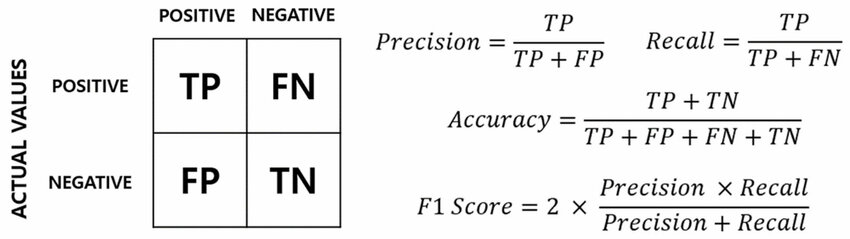



> The functions below are methods seen in the picture that are used for evaluation, with the addition of *map_labels_to_indices* to handle some label errors that occur.




In [ ]:
#handles errors in class labels (errors are unfortunately found after trials, so this function is added)
def map_labels_to_indices(labels):
    unique_labels = np.unique(labels)
    label_to_index = {label: index for index, label in enumerate(unique_labels)}
    indices = np.array([label_to_index[label] for label in labels])
    return indices, label_to_index

#build the confusion matrix
def confusion_matrix(y_true, y_pred):
    #converting true labels (y_true) and predicted labels (y_pred) to integer indices
    y_true_indices, label_to_index = map_labels_to_indices(y_true)
    y_pred_indices = np.array([label_to_index[label] for label in y_pred])

    #identify unique classes in the true labels
    unique_classes = np.unique(y_true_indices)

    #initialize the n by n matrix with zeroes (n = size number of unique classes)
    matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)
    #matrix stores the counts of True VS Predicted class occurrences
    for i in range(len(y_true_indices)):
        true_class = y_true_indices[i]
        pred_class = y_pred_indices[i]
        matrix[true_class][pred_class] += 1
    return matrix

#get precision, recall, f1 score to evaluate classification process
def precision_recall_f1(y_true, y_pred):

    #get the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    #calculate precision
    #---np.diag(cm) == diagonal elements of the CM (True Positives)
    #---np.sum(cm, axis=0) == sum of each COLUMN (True Positives + False Positives)
    precision = np.diag(cm) / np.sum(cm, axis=0, where=(np.sum(cm, axis=0) != 0))
    #when there are no predicted positives at all
    precision[np.isnan(precision)] = 0

    #calculate recall
    #---np.sum(cm, axis=1) == sum of each ROW (True Positives + False Negatives)
    recall = np.diag(cm) / np.sum(cm, axis=1, where=(np.sum(cm, axis=1) != 0))
    #when there are no actual positives, set to 0
    recall[np.isnan(recall)] = 0

    #calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    #when both precision and recall are 0
    f1[np.isnan(f1)] = 0
    return precision, recall, f1

#get accuracy to evaluate classification process
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)



> After getting the *true labels* from of the test set data, the model's results are compared.



In [ ]:
y_true = y_test.to_numpy()  #get the true labels from test set

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

precision, recall, f1 = precision_recall_f1(y_true, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("Accuracy:", accuracy(y_true, y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0  8  2]
 [ 0  1  8]]
Precision: [1.         0.88888889 0.8       ]
Recall: [1.         0.8        0.88888889]
F1 Score: [1.         0.84210526 0.84210526]
Accuracy: 0.9




> It appears that there are 3 misclassifications and 27 correct classifications, according to the confusion matrix.





> Precision measures the **accuracy of positive predictions**, where Precision = True Positives / (True Positives + False Positives). Based on the model's output, the precision values for each class as follows:
1. Class 0 (Iris-setosa): Precision = 1.0 (100%)
2. Class 1 (Iris-versicolor): Precision = 0.88888889 (88.89%)
3. Class 2 (Iris-virginica): Precision = 0.8 (80%)



> Recall measures the **ability of the model to find all the positive samples**, where Recall = True Positives / (True Positives + False Negatives). Based on the model's output, the recall values for each class as follows:
1. Class 0 (Iris-setosa): Recall = 1.0 (100%)
2. Class 1 (Iris-versicolor): Recall = 0.8 (80%)
3. Class 2 (Iris-virginica): Recall = 0.88888889 (88.89%)

> F1 Score is the **harmonic mean of precision and recall**, where F1 Score = 2 * (Precision * Recall) / (Precision + Recall). Based on the model's output, the F1 score values for each class as follows:
1. Class 0 (Iris-setosa): F1 Score = 1.0 (100%)
2. Class 1 (Iris-versicolor): F1 Score = 0.84210526 (84.21%)
3. Class 2 (Iris-virginica): F1 Score = 0.84210526 (84.21%)


> Lastly, the accuracy measures the **ratio of correct predictions to the total number of predictions**. This Gaussian Naive Bayes model has an accuracy of 90%, which is quite desirable.